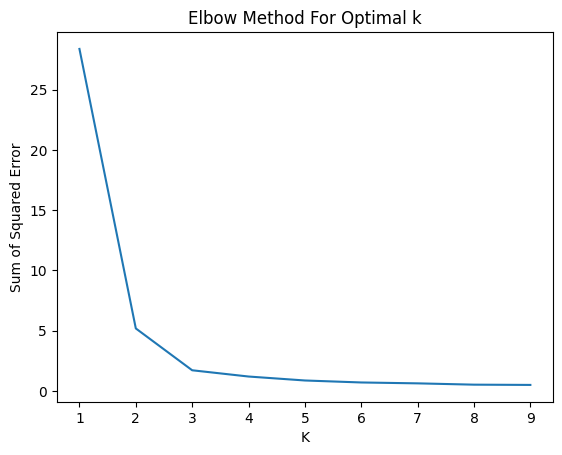

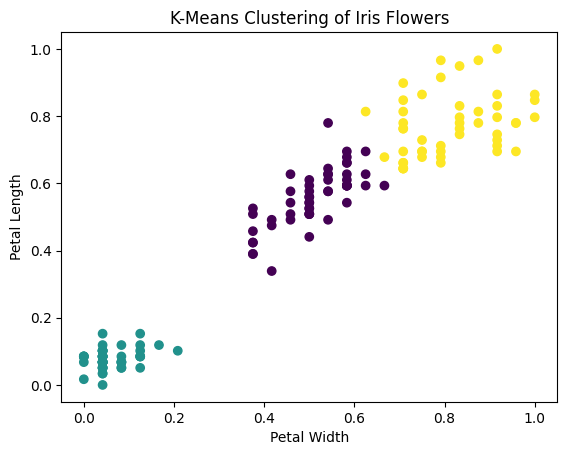

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

# Load data
df = pd.read_csv('iris.csv')
df = df[['petal_width', 'petal_length']]

# Scale the features
scaler = MinMaxScaler()
df[['petal_width', 'petal_length']] = scaler.fit_transform(df[['petal_width', 'petal_length']])

# Find the optimal value of k using the elbow method
sse = []
k_rng = range(1, 10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df)
    sse.append(km.inertia_)

plt.xlabel('K')
plt.ylabel('Sum of Squared Error')
plt.plot(k_rng, sse)
plt.title('Elbow Method For Optimal k')
plt.show()

# Fit KMeans with k=3
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(df)
df['cluster'] = kmeans.labels_

# Visualize the clusters
plt.scatter(df['petal_width'], df['petal_length'], c=df['cluster'], cmap='viridis')
plt.xlabel('Petal Width')
plt.ylabel('Petal Length')
plt.title('K-Means Clustering of Iris Flowers')
plt.show()
